# Notebook Imports

In [1]:
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor

import pandas as pd
from pandas import DataFrame
import statsmodels.api as sm 

import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import numpy as np
from importlib import reload
plt=reload(plt)


%matplotlib inline

# Gather Data
[Source: Original research paper](http://132.247.70.26/profesores/blopez/valoracion-harrison.pdf)

In [2]:
boston_dataset = load_boston()
print(boston_dataset.data.shape) ## (506,13)

(506, 13)


In [3]:
type(boston_dataset)

sklearn.utils.Bunch

In [4]:
dir(boston_dataset)

['DESCR', 'data', 'feature_names', 'filename', 'target']

In [5]:
print(boston_dataset.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

# Data points and features


In [6]:
type(boston_dataset.data)

numpy.ndarray

In [7]:
boston_dataset.data.shape # chaining dot notation

(506, 13)

In [8]:
boston_dataset.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [9]:
boston_dataset.target #actual price in thousands

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 18.7, 16. , 22.2, 25. , 33. , 23.5,
       19.4, 22. , 17.4, 20.9, 24.2, 21.7, 22.8, 23.4, 24.1, 21.4, 20. ,
       20.8, 21.2, 20.3, 28. , 23.9, 24.8, 22.9, 23.9, 26.6, 22.5, 22.2,
       23.6, 28.7, 22.6, 22. , 22.9, 25. , 20.6, 28.4, 21.4, 38.7, 43.8,
       33.2, 27.5, 26.5, 18.6, 19.3, 20.1, 19.5, 19.5, 20.4, 19.8, 19.4,
       21.7, 22.8, 18.8, 18.7, 18.5, 18.3, 21.2, 19.2, 20.4, 19.3, 22. ,
       20.3, 20.5, 17.3, 18.8, 21.4, 15.7, 16.2, 18. , 14.3, 19.2, 19.6,
       23. , 18.4, 15.6, 18.1, 17.4, 17.1, 13.3, 17.8, 14. , 14.4, 13.4,
       15.6, 11.8, 13.8, 15.6, 14.6, 17.8, 15.4, 21

# Data Explore with Pandas Data Frame

In [10]:
#Create DF
data = pd.DataFrame(data = boston_dataset.data, columns = boston_dataset.feature_names)

# add price

data["PRICE"] = boston_dataset.target

In [11]:
data.head()
# data.tail() reads from the bottom

CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  PRICE  
0     15.3  396.90   4.98   24.0  
1     17.8  396.90   9.14   21.6  
2     17.8  392.83   4.03   34.7  
3     18.7  394.63   2.94   33.4  
4     18.7  396.90   5.33   36.2

In [12]:
data.count() # shows number of rows

CRIM       506
ZN         506
INDUS      506
CHAS       506
NOX        506
RM         506
AGE        506
DIS        506
RAD        506
TAX        506
PTRATIO    506
B          506
LSTAT      506
PRICE      506
dtype: int64

# Cleaning Data - Missing Values

In [13]:
pd.isnull(data).any() 

CRIM       False
ZN         False
INDUS      False
CHAS       False
NOX        False
RM         False
AGE        False
DIS        False
RAD        False
TAX        False
PTRATIO    False
B          False
LSTAT      False
PRICE      False
dtype: bool

In [14]:
data.info() #pandas df approach

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  PRICE    506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


# Visualising Data - Histograms, Distrabutions and Bar Charts

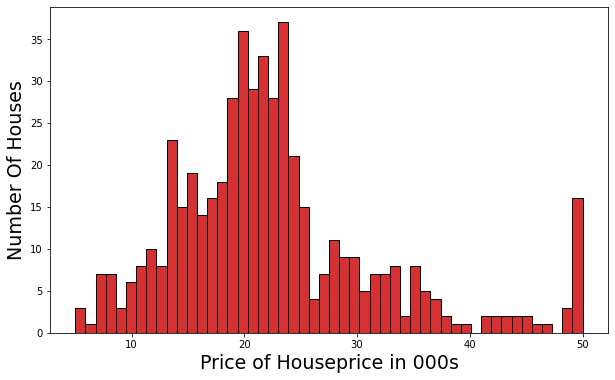

In [15]:
plt.figure(figsize = (10,6))
plt.hist(data["PRICE"], bins = 50, ec = "black" , color = "#d53032")
plt.xlabel("Price of Houseprice in 000s" , fontsize = 19)
plt.ylabel("Number Of Houses", fontsize = 19)


plt.show()

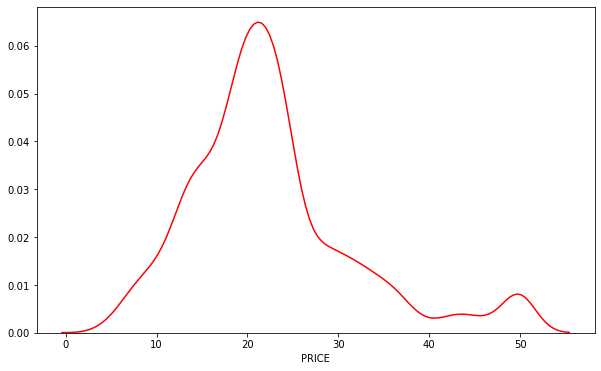

In [16]:
plt.figure(figsize = (10,6))
sns.distplot(data["PRICE"], bins = 50 , hist = False , kde = True, color = "red") #Probability density function 

plt.show()

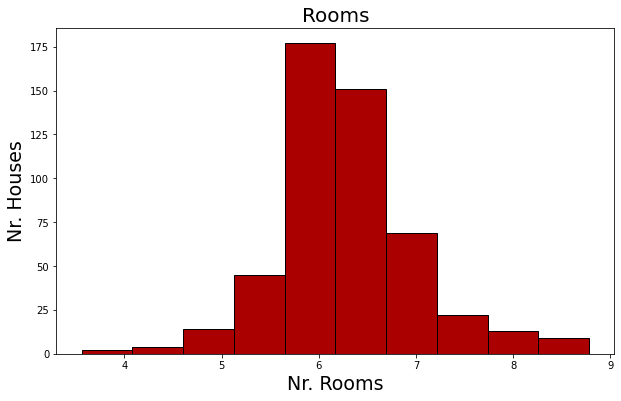

In [17]:
plt.figure(figsize = (10,6))
plt.hist(data["RM"], bins = 10, ec = "black" , color = "#aa0000")
plt.title("Rooms", fontsize = 20)
plt.xlabel("Nr. Rooms" , fontsize = 19)
plt.ylabel("Nr. Houses", fontsize = 19)


plt.show()

In [18]:
data["RM"].mean()

6.284634387351787

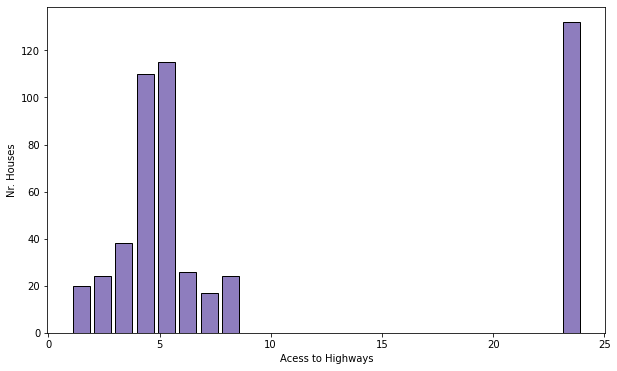

In [19]:
## create meaningful histogram for RAD

plt.figure(figsize = (10,6))
plt.xlabel("Acess to Highways")
plt.ylabel("Nr. Houses")
plt.hist(data["RAD"], bins = 24 , rwidth = 0.8 , ec = "black" , color = "#8E7DBE")
plt.show()

In [20]:
data["RAD"].value_counts() #ranked 1- 24 , 24 beingh high acess

24.0    132
5.0     115
4.0     110
3.0      38
6.0      26
8.0      24
2.0      24
1.0      20
7.0      17
Name: RAD, dtype: int64

In [21]:
frequency = data["RAD"].value_counts() #ranked 1- 24 , 24 beingh high acess
type(frequency)

# or frequency.axes[0], sets fq on x axis 

pandas.core.series.Series

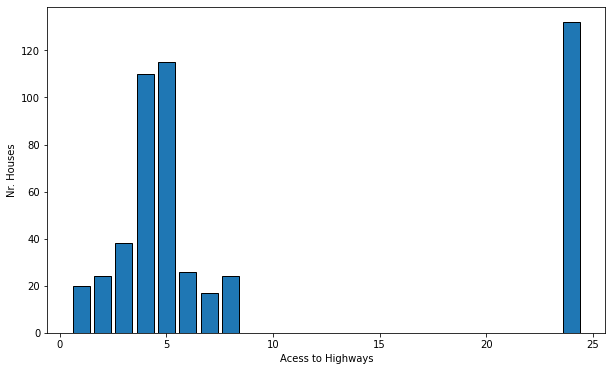

In [22]:
plt.figure(figsize = (10,6))
plt.bar(frequency.index, height = frequency, ec = "black")
plt.xlabel("Acess to Highways")
plt.ylabel("Nr. Houses")

plt.show()

In [23]:
## houses near chas river

data["CHAS"].value_counts()

0.0    471
1.0     35
Name: CHAS, dtype: int64

# Descriptive Statistics

In [24]:
data.describe()



CRIM          ZN       INDUS        CHAS         NOX          RM  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.613524   11.363636   11.136779    0.069170    0.554695    6.284634   
std      8.601545   23.322453    6.860353    0.253994    0.115878    0.702617   
min      0.006320    0.000000    0.460000    0.000000    0.385000    3.561000   
25%      0.082045    0.000000    5.190000    0.000000    0.449000    5.885500   
50%      0.256510    0.000000    9.690000    0.000000    0.538000    6.208500   
75%      3.677083   12.500000   18.100000    0.000000    0.624000    6.623500   
max     88.976200  100.000000   27.740000    1.000000    0.871000    8.780000   

              AGE         DIS         RAD         TAX     PTRATIO           B  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean    68.574901    3.795043    9.549407  408.237154   18.455534  356.674032   
std     28.148861    2.105710    8.707259  168.537116    2.164946   91.294864   
min      2.900000    1.129600    1.000000  187.000000   12.600000    0.320000   
25%     45.025000    2.100175    4.000000  279.000000   17.400000  375.377500   
50%     77.500000    3.207450    5.000000  330.000000   19.050000  391.440000   
75%     94.075000    5.188425   24.000000  666.000000   20.200000  396.225000   
max    100.000000   12.126500   24.000000  711.000000   22.000000  396.900000   

            LSTAT       PRICE  
count  506.000000  506.000000  
mean    12.653063   22.532806  
std      7.141062    9.197104  
min      1.730000    5.000000  
25%      6.950000   17.025000  
50%     11.360000   21.200000  
75%     16.955000   25.000000  
max     37.970000   50.000000

## Correlation

## $$\rho_{x,y} = corr(x,y)$$
## $$ -1.0 \leq \rho _{x,y} \leq +1.0$$

In [25]:
data["PRICE"].corr(data["RM"]) # price against rooms

0.695359947071539

In [26]:
data["PRICE"].corr(data["PTRATIO"]) # price against student:teacher

-0.5077866855375615

In [27]:
data.corr() # pearson correlation co-ef

CRIM        ZN     INDUS      CHAS       NOX        RM       AGE  \
CRIM     1.000000 -0.200469  0.406583 -0.055892  0.420972 -0.219247  0.352734   
ZN      -0.200469  1.000000 -0.533828 -0.042697 -0.516604  0.311991 -0.569537   
INDUS    0.406583 -0.533828  1.000000  0.062938  0.763651 -0.391676  0.644779   
CHAS    -0.055892 -0.042697  0.062938  1.000000  0.091203  0.091251  0.086518   
NOX      0.420972 -0.516604  0.763651  0.091203  1.000000 -0.302188  0.731470   
RM      -0.219247  0.311991 -0.391676  0.091251 -0.302188  1.000000 -0.240265   
AGE      0.352734 -0.569537  0.644779  0.086518  0.731470 -0.240265  1.000000   
DIS     -0.379670  0.664408 -0.708027 -0.099176 -0.769230  0.205246 -0.747881   
RAD      0.625505 -0.311948  0.595129 -0.007368  0.611441 -0.209847  0.456022   
TAX      0.582764 -0.314563  0.720760 -0.035587  0.668023 -0.292048  0.506456   
PTRATIO  0.289946 -0.391679  0.383248 -0.121515  0.188933 -0.355501  0.261515   
B       -0.385064  0.175520 -0.356977  0.048788 -0.380051  0.128069 -0.273534   
LSTAT    0.455621 -0.412995  0.603800 -0.053929  0.590879 -0.613808  0.602339   
PRICE   -0.388305  0.360445 -0.483725  0.175260 -0.427321  0.695360 -0.376955   

              DIS       RAD       TAX   PTRATIO         B     LSTAT     PRICE  
CRIM    -0.379670  0.625505  0.582764  0.289946 -0.385064  0.455621 -0.388305  
ZN       0.664408 -0.311948 -0.314563 -0.391679  0.175520 -0.412995  0.360445  
INDUS   -0.708027  0.595129  0.720760  0.383248 -0.356977  0.603800 -0.483725  
CHAS    -0.099176 -0.007368 -0.035587 -0.121515  0.048788 -0.053929  0.175260  
NOX     -0.769230  0.611441  0.668023  0.188933 -0.380051  0.590879 -0.427321  
RM       0.205246 -0.209847 -0.292048 -0.355501  0.128069 -0.613808  0.695360  
AGE     -0.747881  0.456022  0.506456  0.261515 -0.273534  0.602339 -0.376955  
DIS      1.000000 -0.494588 -0.534432 -0.232471  0.291512 -0.496996  0.249929  
RAD     -0.494588  1.000000  0.910228  0.464741 -0.444413  0.488676 -0.381626  
TAX     -0.534432  0.910228  1.000000  0.460853 -0.441808  0.543993 -0.468536  
PTRATIO -0.232471  0.464741  0.460853  1.000000 -0.177383  0.374044 -0.507787  
B        0.291512 -0.444413 -0.441808 -0.177383  1.000000 -0.366087  0.333461  
LSTAT   -0.496996  0.488676  0.543993  0.374044 -0.366087  1.000000 -0.737663  
PRICE    0.249929 -0.381626 -0.468536 -0.507787  0.333461 -0.737663  1.000000

In [28]:
mask = np.zeros_like(data.corr())
triangle_indices = np.triu_indices_from(mask)
mask[triangle_indices] = True
mask

array([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]])

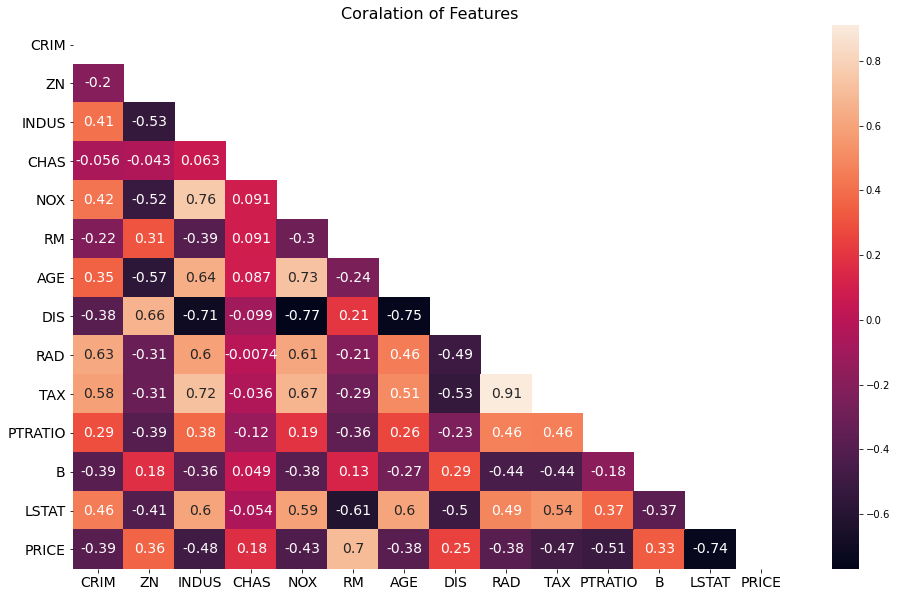

In [29]:
plt.figure(figsize = (16,10))
sns.heatmap(data.corr(), mask = mask, annot=True , annot_kws = {"size" : 14})
# sns.set_style = "white" or .set_style('white')
plt.title("Coralation of Features", fontsize = 16)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)



plt.show()

In [30]:
#person only good for continuous values , RAD/TAX/CHAS is not continuous either.
#Linier Realtionships only
#corrilation does not imply causatiion
#

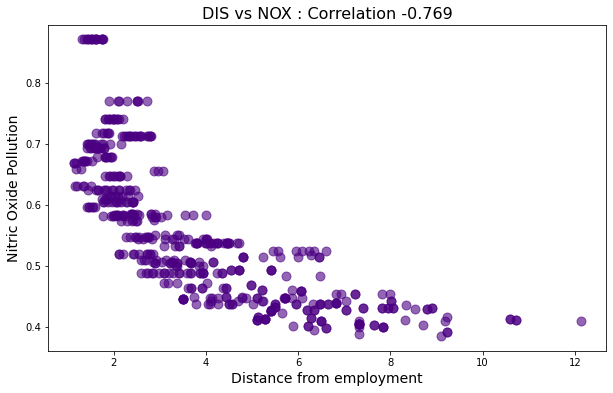

In [31]:
nox_diss_corr = round(data["NOX"].corr(data["DIS"]), 3)

plt.figure(figsize = (10,6))
plt.scatter(data["DIS"], data["NOX"], alpha = 0.6 , s=80, color = "indigo")
plt.title(f"DIS vs NOX : Correlation {nox_diss_corr}" , fontsize = 16)
plt.xlabel("Distance from employment" , fontsize =14)
plt.ylabel("Nitric Oxide Pollution", fontsize = 14)
plt.show()


P:\Programmes\anaconda3\lib\site-packages\seaborn\axisgrid.py:1840: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


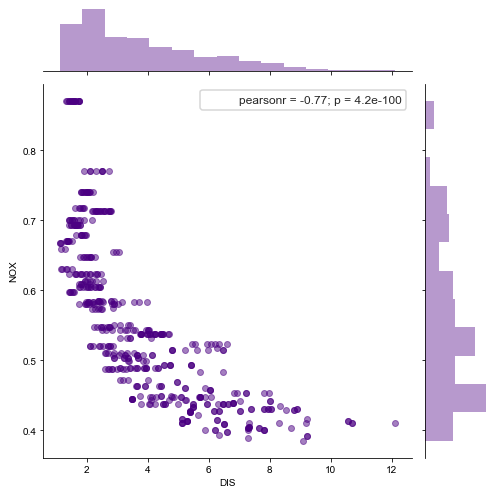

In [32]:
j = sns.jointplot(x= data["DIS"], y= data["NOX"], height = 7, color ="indigo", joint_kws = {"alpha" : 0.5}) #joinplot will be removing annotation soon ()check version()
sns.set_context("talk")
sns.set_style("whitegrid") 
j.annotate(stats.pearsonr, fontsize = 12) 
plt.show()  ## Need to run cell mutiple time *FIX*

P:\Programmes\anaconda3\lib\site-packages\seaborn\axisgrid.py:1840: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


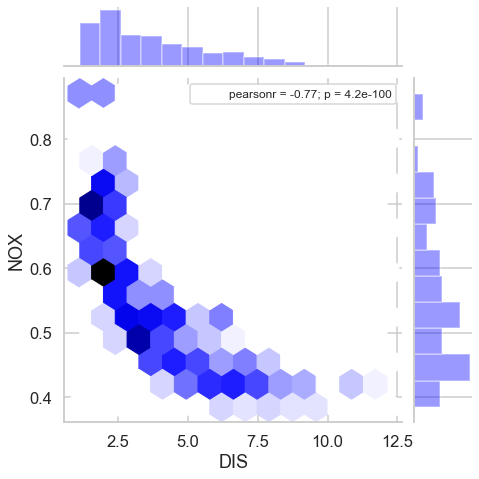

In [33]:
j = sns.jointplot(x= data["DIS"], y= data["NOX"], kind= 'hex', height = 7, color ="blue")
sns.set_context("talk")
sns.set_style("whitegrid") 
j.annotate(stats.pearsonr, fontsize = 12) 
plt.show() 

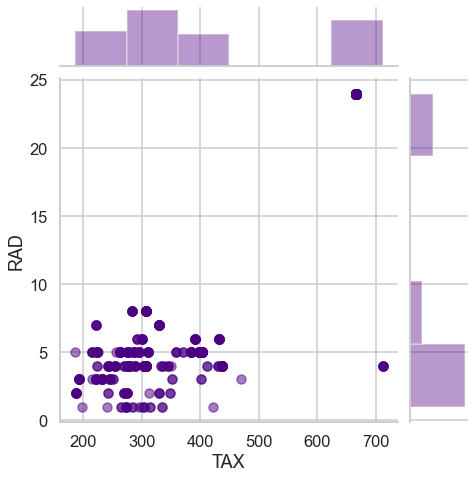

In [34]:
sns.jointplot(x= data["TAX"], y= data["RAD"], height = 7, color ="Indigo", joint_kws = {"alpha" : 0.5})
sns.set_context("talk")
sns.set_style("whitegrid") 
plt.show() ## outliers shifting our regression , not so useful model

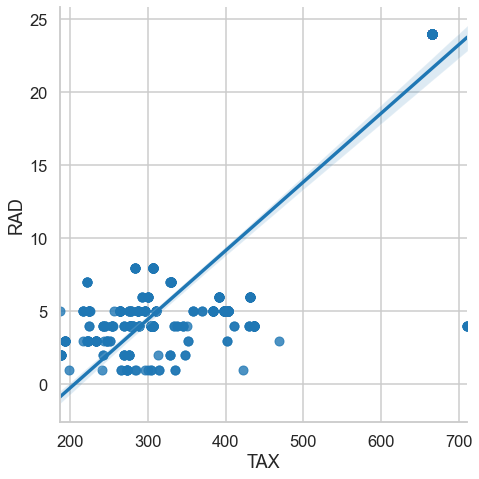

In [35]:
sns.lmplot(x = "TAX" , y = "RAD" , data = data , height = 7)
plt.show()

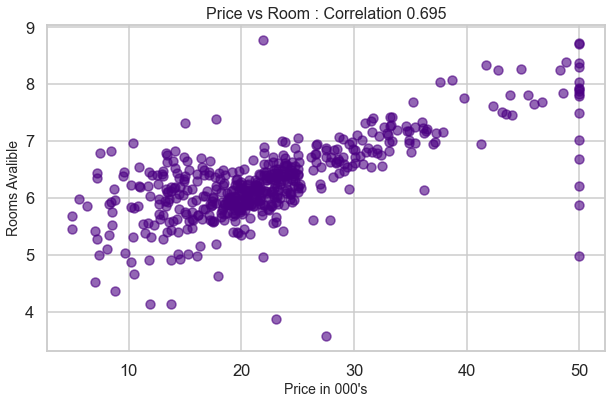

In [36]:
rm_diss_corr = round(data["PRICE"].corr(data["RM"]), 3)

plt.figure(figsize = (10,6))
plt.scatter(data["PRICE"], data["RM"], alpha = 0.6 , s=80, color = "indigo")
plt.title(f"Price vs Room : Correlation {rm_diss_corr}" , fontsize = 16)
plt.xlabel("Price in 000's" , fontsize =14)
plt.ylabel("Rooms Avalible", fontsize = 14)
plt.show()


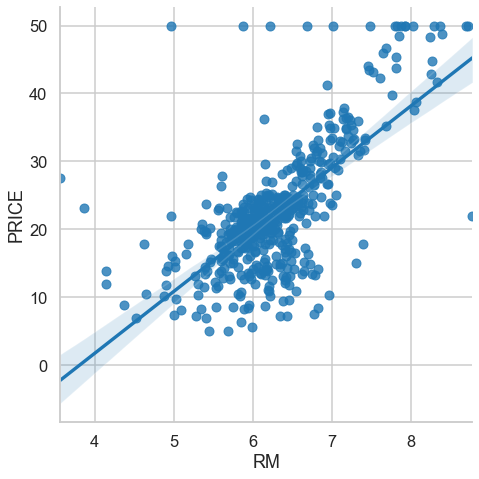

In [37]:
sns.lmplot(x = "RM", y = "PRICE", data = data , height = 7)   ## inverse graph for practice RM VS PRICE
plt.show()

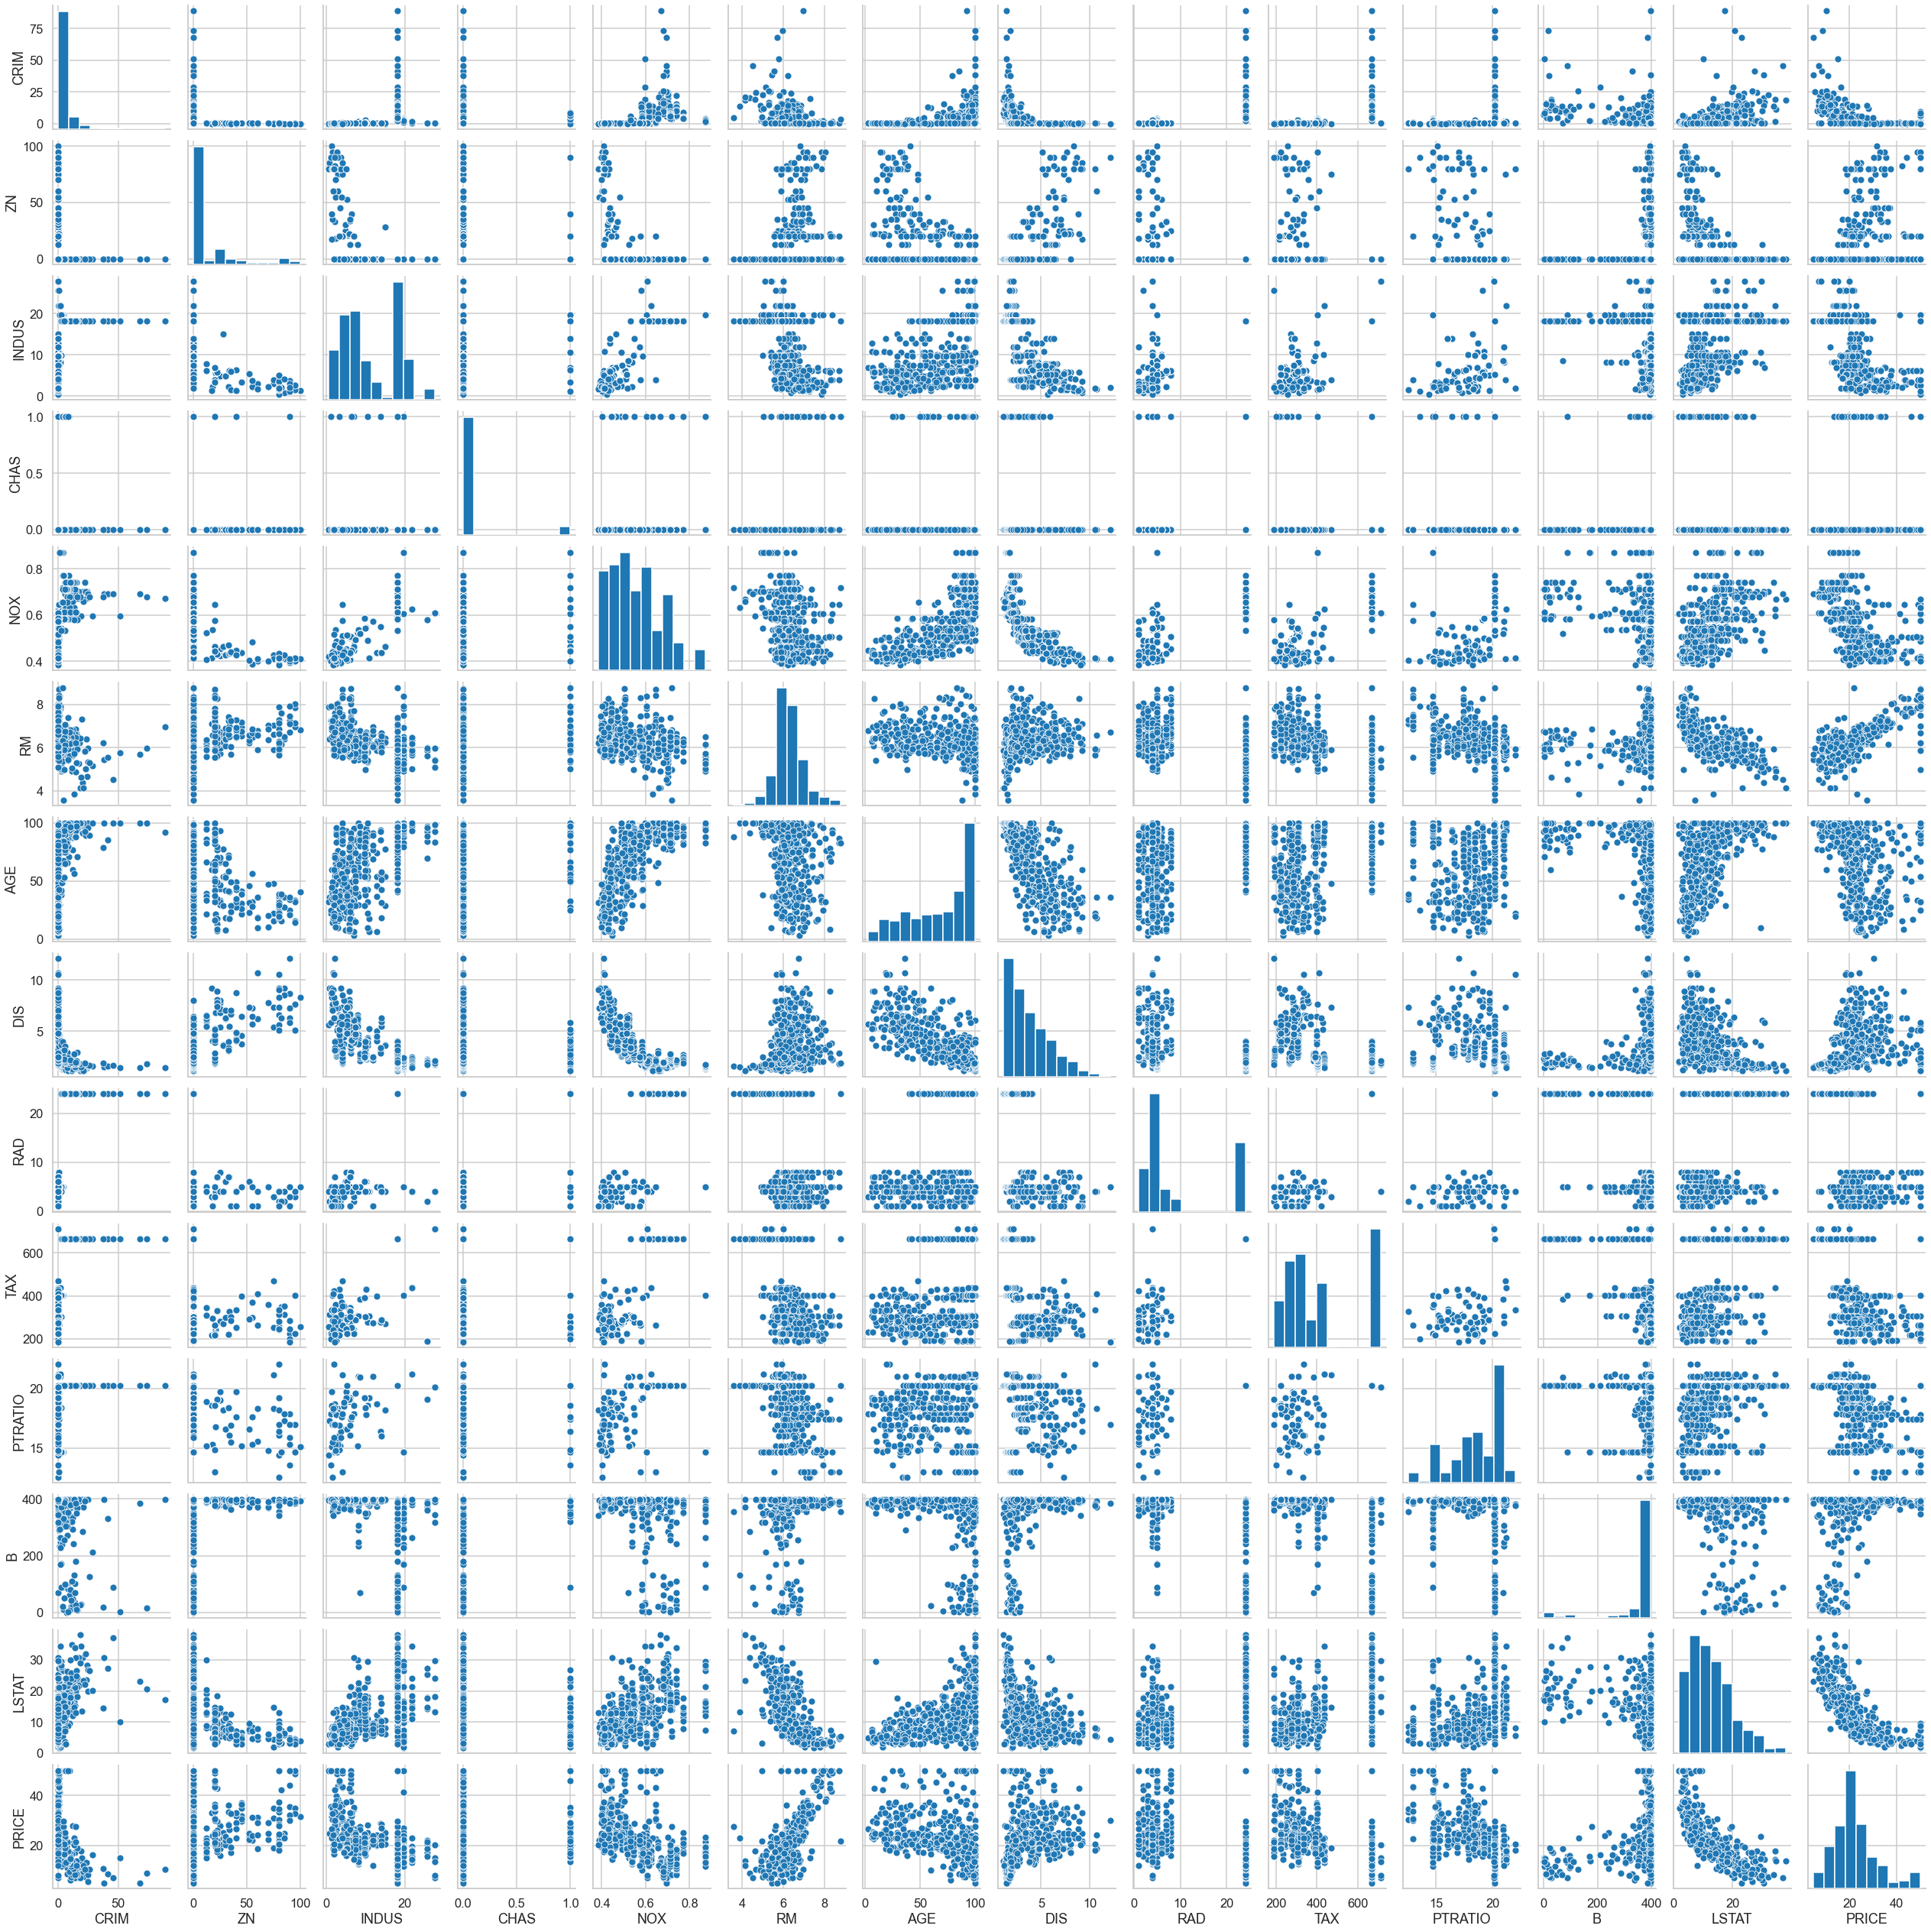

In [38]:
sns.pairplot(data)
# microbenchmark code %%time
plt.show()

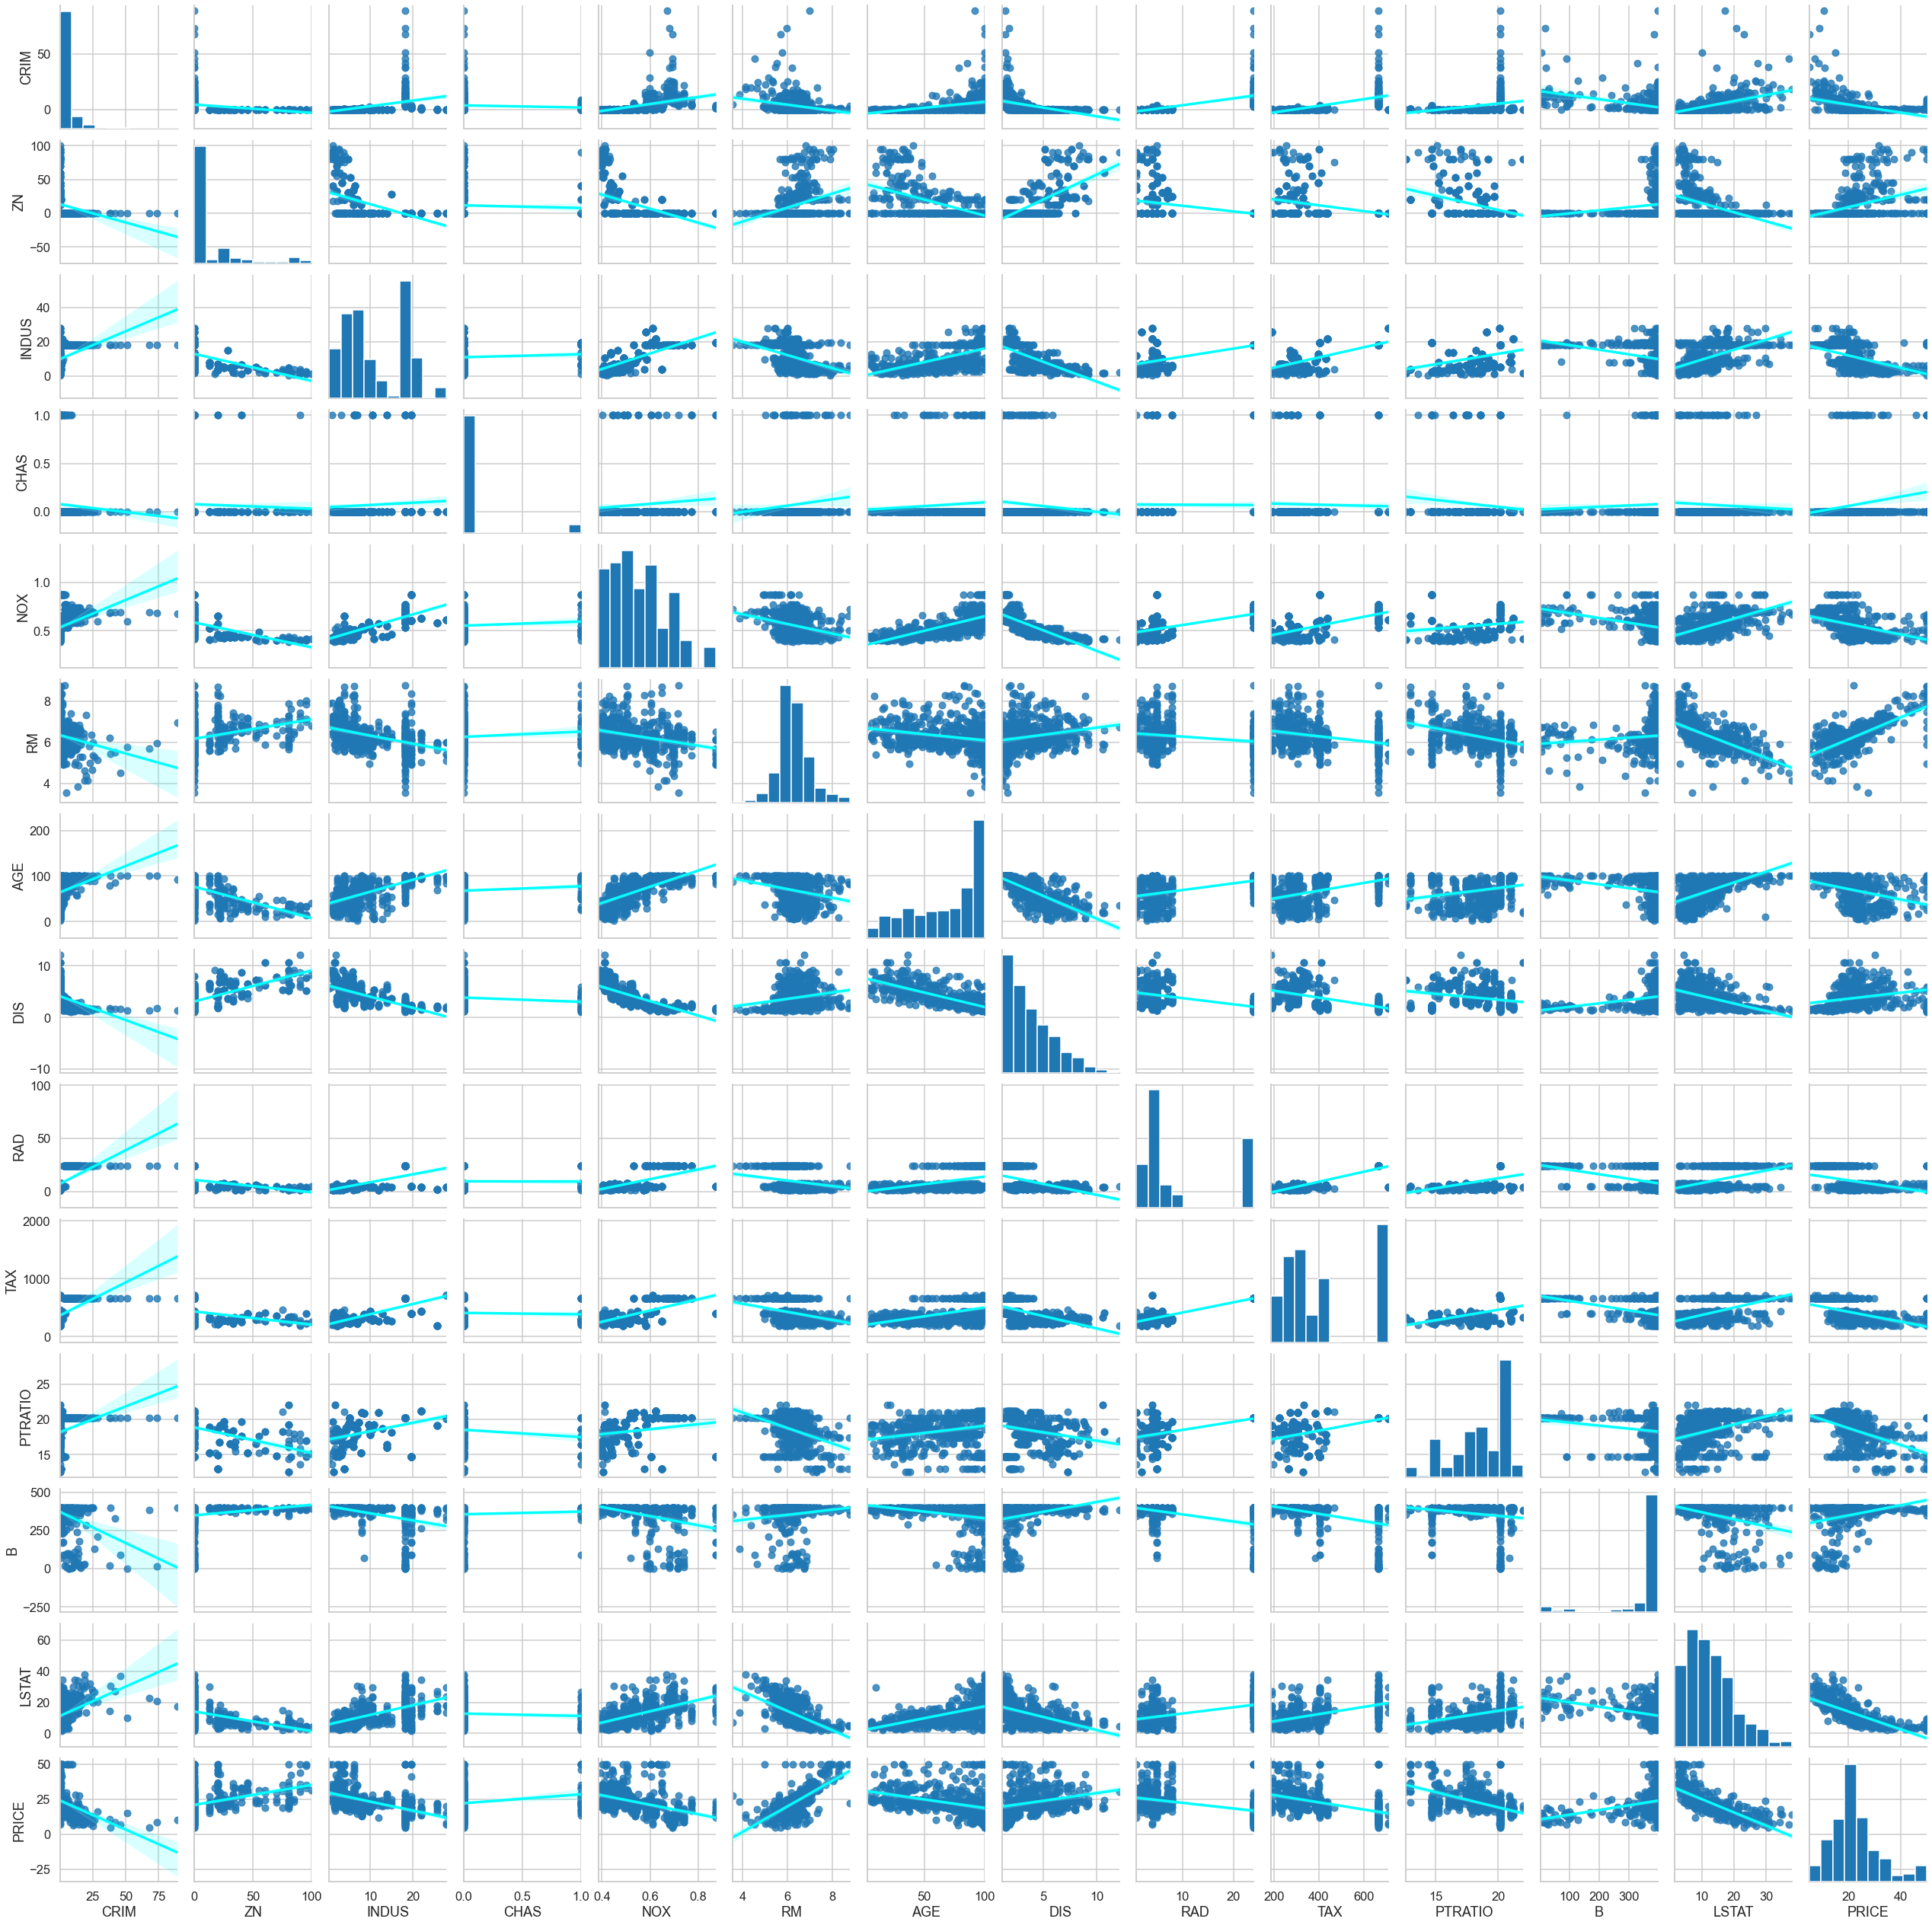

In [39]:
sns.pairplot(data, kind = "reg", plot_kws = {"line_kws" : {"color" : "cyan"}})
plt.show()

# Training and Test Dataset Split


In [40]:
prices = data["PRICE"]
features = data.drop("PRICE", axis = 1)

X_train, X_test, y_train , y_test = train_test_split(features, prices, test_size =0.2 ,
                                                     random_state = 10) #not a random shuffle
len(X_train)/len(features) # % of Training set

0.7984189723320159

In [41]:
X_test.shape[0]/features.shape[0]

0.2015810276679842

# Multivarient Regression

In [42]:
regr = LinearRegression()
regr.fit(X_train , y_train)

print("Training Data r-squared :" , regr.score(X_train, y_train))
print("Test Data r-squared :" , regr.score(X_test, y_test)) # hasnt been seen yet

print("Intercept" , regr.intercept_)
pd.DataFrame(data = regr.coef_ , index = X_train.columns , columns = ["coef"]) #Theta Values



Training Data r-squared : 0.750121534530608
Test Data r-squared : 0.6709339839115628
Intercept 36.53305138282439


coef
CRIM     -0.128181
ZN        0.063198
INDUS    -0.007576
CHAS      1.974515
NOX     -16.271989
RM        3.108456
AGE       0.016292
DIS      -1.483014
RAD       0.303988
TAX      -0.012082
PTRATIO  -0.820306
B         0.011419
LSTAT    -0.581626

In [43]:
# r-square, p-values , V.I.F , BIC

## Data Transformation 

In [44]:
data["PRICE"].skew()

1.1080984082549072

In [45]:
#log transformation
y_log = np.log(data["PRICE"])
y_log.tail()

501    3.109061
502    3.025291
503    3.173878
504    3.091042
505    2.476538
Name: PRICE, dtype: float64

In [46]:
y_log.skew()

-0.33032129530987864

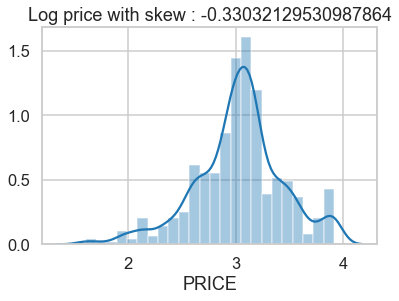

In [47]:
sns.distplot(y_log)
plt.title(f"Log price with skew : {y_log.skew()}")
plt.show()

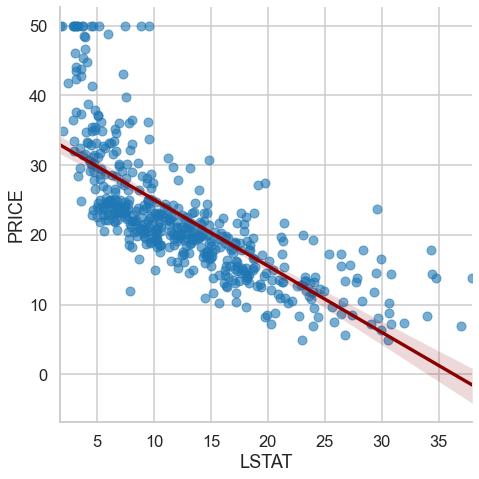

In [48]:
sns.lmplot(x ="LSTAT" , y= "PRICE" , data = data , height = 7 ,
           scatter_kws = {"alpha" : 0.6} , line_kws = {"color" : "darkred"})
plt.show()

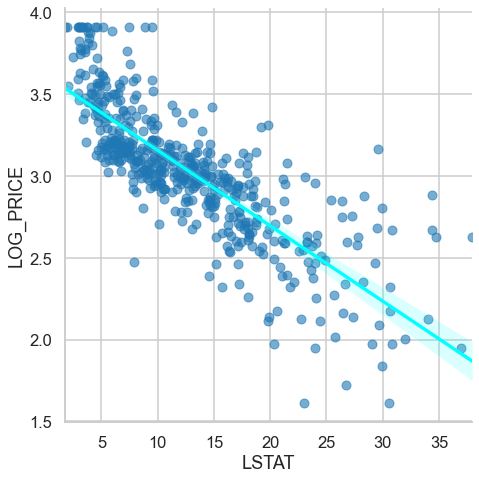

In [49]:
transformed_data = features
transformed_data["LOG_PRICE"] = y_log

sns.lmplot(x ="LSTAT" , y= "LOG_PRICE" , data = transformed_data , height = 7 ,
           scatter_kws = {"alpha" : 0.6} , line_kws = {"color" : "cyan"})
plt.show()

## Regression using log prices

In [50]:
prices = np.log(data["PRICE"]) 
features = data.drop("PRICE", axis = 1)

X_train, X_test, y_train , y_test = train_test_split(features, prices, test_size =0.2 ,
                                                     random_state = 10)
regr = LinearRegression()
regr.fit(X_train , y_train)

print("Training Data r-squared :" , regr.score(X_train, y_train))
print("Test Data r-squared :" , regr.score(X_test, y_test)) 

print("Intercept" , regr.intercept_)
pd.DataFrame(data = regr.coef_ , index = X_train.columns , columns = ["coef"]) #Theta Values

Training Data r-squared : 0.7930234826697583
Test Data r-squared : 0.7446922306260724
Intercept 4.05994387177519


coef
CRIM    -0.010672
ZN       0.001579
INDUS    0.002030
CHAS     0.080331
NOX     -0.704068
RM       0.073404
AGE      0.000763
DIS     -0.047633
RAD      0.014565
TAX     -0.000645
PTRATIO -0.034795
B        0.000516
LSTAT   -0.031390

In [51]:
#Charles river property premium
np.e**0.080331


1.0836456950439142

# P values and Evaluaiing coeficients

In [52]:
#p-value is significant if the p value > 0.05 it is not statisticly significant

In [53]:
x_incl_const = sm.add_constant(X_train)

model = sm.OLS(y_train, x_incl_const) # Oridinary least square
results = model.fit()

# results.params
#results.pvalues

pd.DataFrame({"coef": results.params, "p-values" : round(results.pvalues, 3)})

coef  p-values
const    4.059944     0.000
CRIM    -0.010672     0.000
ZN       0.001579     0.009
INDUS    0.002030     0.445
CHAS     0.080331     0.038
NOX     -0.704068     0.000
RM       0.073404     0.000
AGE      0.000763     0.209
DIS     -0.047633     0.000
RAD      0.014565     0.000
TAX     -0.000645     0.000
PTRATIO -0.034795     0.000
B        0.000516     0.000
LSTAT   -0.031390     0.000

In [54]:
# multicolinierity : loss of reliability, high variable in thesta esimates , strange/misleading findings 
# VIF : variance inflation factor

# Testing for Multicoliniearity

$$ TAX = \alpha_0 + \alpha_1 RM + \alpha_2 + \alpha_3 NOX + .... + \alpha_{12} LSTAT $$
$$ VIF_{TAX} = \frac {1}{(1 - R_{TAX} ^ 2 )} $$

In [55]:
variance_inflation_factor(exog= x_incl_const.values , exog_idx= 1) 
# not zero as its our constant intercept
# .values wil convert DF to np array


1.7145250443932485

In [56]:
len(x_incl_const.columns) #OR x_incl_const.shape[1]

14

In [57]:
for i  in range(x_incl_const.shape[1]) :
    print(variance_inflation_factor( exog=x_incl_const.values , exog_idx= i))

597.5487126763895
1.7145250443932485
2.3328224265597584
3.943448822674636
1.0788133385000578
4.410320817897635
1.8404053075678568
3.3267660823099408
4.222923410477865
7.314299817005058
8.508856493040817
1.839911632651406
1.3386713255364715
2.812544292793034


In [58]:
vif = []
for i  in range(x_incl_const.shape[1]) :
    vif.append(variance_inflation_factor(exog=x_incl_const.values , exog_idx= i))
print(vif)

[597.5487126763895, 1.7145250443932485, 2.3328224265597584, 3.943448822674636, 1.0788133385000578, 4.410320817897635, 1.8404053075678568, 3.3267660823099408, 4.222923410477865, 7.314299817005058, 8.508856493040817, 1.839911632651406, 1.3386713255364715, 2.812544292793034]


In [59]:
vif = [variance_inflation_factor(exog=x_incl_const.values , exog_idx= i) for i  in range(x_incl_const.shape[1])]

pd.DataFrame({"coef_name" : x_incl_const.columns , "vif" : np.around(vif, 2)})

#VIF > 10 a problem/statisticval issue, some belive 5 is better


coef_name     vif
0      const  597.55
1       CRIM    1.71
2         ZN    2.33
3      INDUS    3.94
4       CHAS    1.08
5        NOX    4.41
6         RM    1.84
7        AGE    3.33
8        DIS    4.22
9        RAD    7.31
10       TAX    8.51
11   PTRATIO    1.84
12         B    1.34
13     LSTAT    2.81

In [60]:
#BIC baysian inormation criterion, complexity

# Model Simplification and the BIC


In [61]:
# Origional log price and all features model

x_incl_const = sm.add_constant(X_train)

model = sm.OLS(y_train, x_incl_const) 
results = model.fit()

org_coeff = pd.DataFrame({"coef": results.params, "p-values" : round(results.pvalues, 3)})

print(f"r-squared value : {results.rsquared}")
print(f"BIC Value : {results.bic}")

r-squared value : 0.7930234826697582
BIC Value : -139.74997769478875


In [62]:
# reduced model exl indus #1 

x_incl_const = sm.add_constant(X_train)
x_incl_const = x_incl_const.drop(["INDUS"], axis  = 1)


model = sm.OLS(y_train, x_incl_const) 
results = model.fit()

coeff_minus_indus = pd.DataFrame({"coef": results.params, "p-values" : round(results.pvalues, 3)})

print(f"r-squared value : {results.rsquared}")
print(f"BIC Value : {results.bic}")

r-squared value : 0.7927126289415163
BIC Value : -145.14508855591163


In [63]:
# reduced model #2 exl indus, AGE

x_incl_const = sm.add_constant(X_train)
x_incl_const = x_incl_const.drop(["INDUS","AGE"], axis  = 1)


model = sm.OLS(y_train, x_incl_const) 
results = model.fit()

reduced_coeff = pd.DataFrame({"coef": results.params, "p-values" : round(results.pvalues, 3)})

print(f"r-squared value : {results.rsquared}")
print(f"BIC Value : {results.bic}")

r-squared value : 0.7918657661852815
BIC Value : -149.49934294224656


In [64]:
frames = [org_coeff, coeff_minus_indus , reduced_coeff]
pd.concat(frames, axis = 1)

coef  p-values      coef  p-values      coef  p-values
const    4.059944     0.000  4.056231     0.000  4.035922     0.000
CRIM    -0.010672     0.000 -0.010721     0.000 -0.010702     0.000
ZN       0.001579     0.009  0.001551     0.010  0.001461     0.014
INDUS    0.002030     0.445       NaN       NaN       NaN       NaN
CHAS     0.080331     0.038  0.082795     0.032  0.086449     0.025
NOX     -0.704068     0.000 -0.673365     0.000 -0.616448     0.000
RM       0.073404     0.000  0.071739     0.000  0.076133     0.000
AGE      0.000763     0.209  0.000766     0.207       NaN       NaN
DIS     -0.047633     0.000 -0.049394     0.000 -0.052692     0.000
RAD      0.014565     0.000  0.014014     0.000  0.013743     0.000
TAX     -0.000645     0.000 -0.000596     0.000 -0.000590     0.000
PTRATIO -0.034795     0.000 -0.034126     0.000 -0.033481     0.000
B        0.000516     0.000  0.000511     0.000  0.000518     0.000
LSTAT   -0.031390     0.000 -0.031262     0.000 -0.030271     0.000

## Residuals and Residual Plot

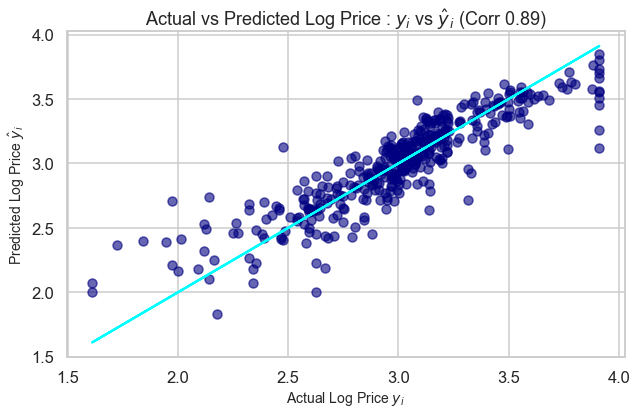

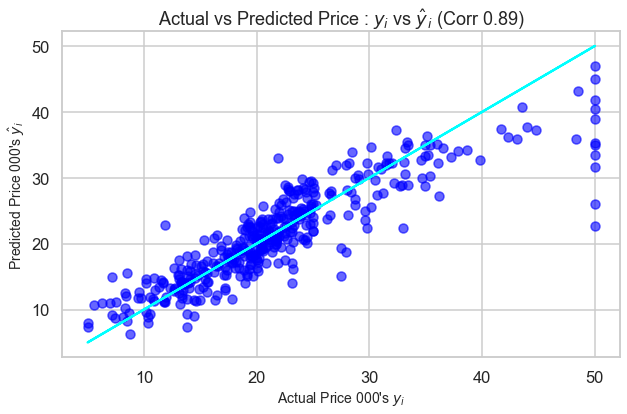

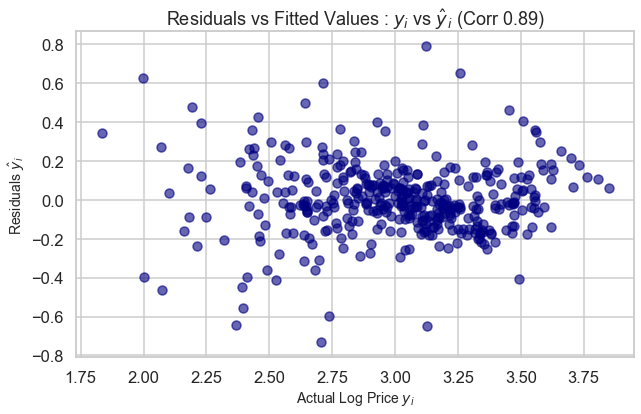


MSE : 0.035, rsquared : 0.792


In [65]:
# modified model: transformed with log prices and simplified (drogging two features)
prices = np.log(data["PRICE"])  # use log prive
features = data.drop(["PRICE", "INDUS", "AGE"], axis = 1)

X_train, X_test, y_train , y_test = train_test_split(features, prices, test_size =0.2 ,
                                                     random_state = 10)
#using Statsmodel

x_incl_const = sm.add_constant(X_train)

model = sm.OLS(y_train, x_incl_const) 
results = model.fit()

#residuals
# residuals = y_train - results.fittedvalues
# results.resid

# Graph of Actual vs Predicted Prices LOG

corr = round(y_train.corr(results.fittedvalues), 2)
plt.figure(figsize = (10,6))
plt.scatter(x = y_train , y = results.fittedvalues , c = "navy" , alpha = 0.6)
plt.plot(y_train , y_train , color ="cyan")
plt.title(f"Actual vs Predicted Log Price : $y_i$ vs $\hat y_i$ (Corr {corr})")
plt.xlabel("Actual Log Price $y_i$" , fontsize = 14) 
plt.ylabel("Predicted Log Price $\hat y_i$" , fontsize = 14)
plt.show()


# Graph of Actual vs Predicted Prices 000's

plt.figure(figsize = (10,6))
plt.scatter(x = np.e**y_train , y = np.e**results.fittedvalues , c = "blue" , alpha = 0.6)
plt.plot(np.e**y_train , np.e**y_train , color ="cyan")
plt.title(f"Actual vs Predicted Price : $y_i$ vs $\hat y_i$ (Corr {corr})")

plt.xlabel("Actual Price 000's $y_i$" , fontsize = 14) 
plt.ylabel("Predicted Price 000's $\hat y_i$" , fontsize = 14)
plt.show() 

print()

#residuals vs predicted

plt.figure(figsize = (10,6))
plt.scatter(x = results.fittedvalues , y = results.resid , c = "navy" , alpha = 0.6)
plt.title(f"Residuals vs Fitted Values : $y_i$ vs $\hat y_i$ (Corr {corr})")

plt.xlabel("Actual Log Price $y_i$" , fontsize = 14) 
plt.ylabel("Residuals $\hat y_i$" , fontsize = 14)
plt.show() 

print()

#MSE + rsquared

reduced_log_mse = round(results.mse_resid, 3)
reduced_log_rsquared = round(results.rsquared,3)
print(f"MSE : {reduced_log_mse}, rsquared : {reduced_log_rsquared}")

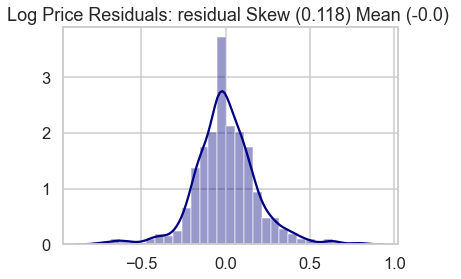

In [66]:
#Distrabution of Residuals (log pprice) - chec cking notmality

resid_mean =round(results.resid.mean(),3)
resid_skew =round(results.resid.skew(),3)

sns.distplot(results.resid , color = "navy")
plt.title(f"Log Price Residuals: residual Skew ({resid_skew}) Mean ({resid_mean}) ")
plt.show()

In [67]:
# cvhallenge use the origional model for , actual vs predicted price incl correlation
#residuals vs predicted prices
#distrebution of resuiduals including skew

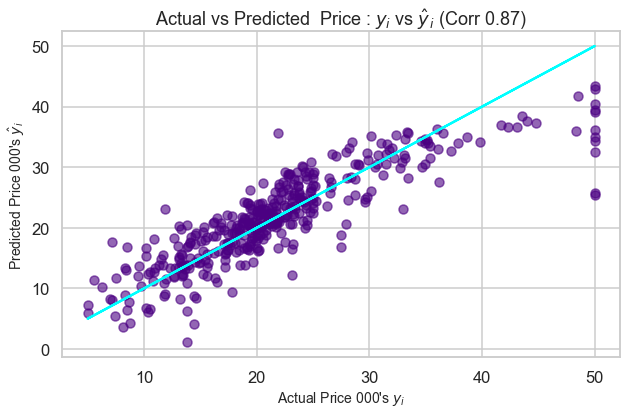

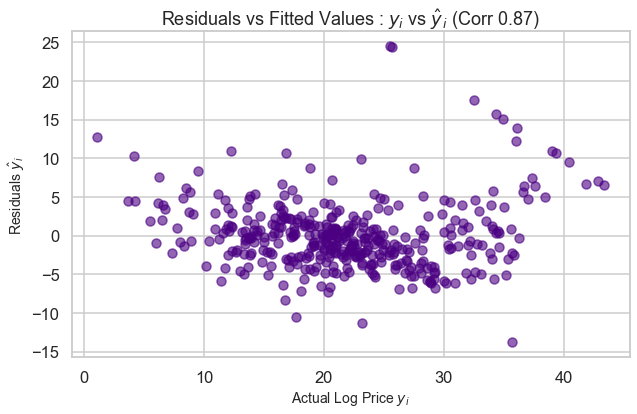

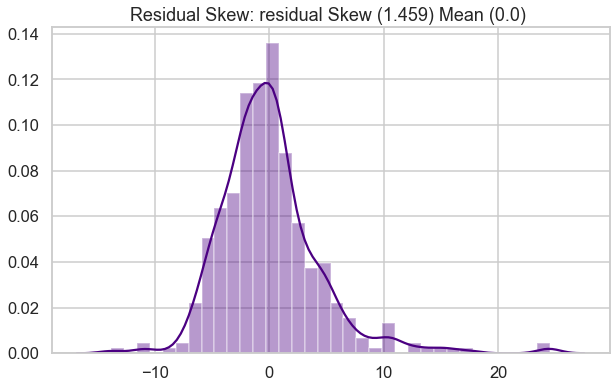

MSE : 19.921, rsquared : 0.75


In [68]:

prices = data["PRICE"]  # use log prive
features = data.drop(["PRICE"], axis = 1)

X_train, X_test, y_train , y_test = train_test_split(features, prices, test_size =0.2 ,
                                                     random_state = 10)

x_incl_const = sm.add_constant(X_train)

model = sm.OLS(y_train, x_incl_const) 
results = model.fit()

#residuals
# residuals = y_train - results.fittedvalues
# results.resid

# Graph of Actual vs Predicted Prices LOG

corr = round(y_train.corr(results.fittedvalues), 2)
plt.figure(figsize = (10,6))
plt.scatter(x = y_train , y = results.fittedvalues , c = "indigo" , alpha = 0.6)
plt.plot(y_train , y_train , color ="cyan")
plt.title(f"Actual vs Predicted  Price : $y_i$ vs $\hat y_i$ (Corr {corr})")
plt.xlabel("Actual Price 000's $y_i$" , fontsize = 14) 
plt.ylabel("Predicted Price 000's $\hat y_i$" , fontsize = 14)
plt.show()


#residuals vs predicted

plt.figure(figsize = (10,6))
plt.scatter(x = results.fittedvalues , y = results.resid , c = "indigo" , alpha = 0.6)
plt.title(f"Residuals vs Fitted Values : $y_i$ vs $\hat y_i$ (Corr {corr})")

plt.xlabel("Actual Log Price $y_i$" , fontsize = 14) 
plt.ylabel("Residuals $\hat y_i$" , fontsize = 14)
plt.show() 

print()

# distrabution of redisuals

resid_mean =round(results.resid.mean(),3)
resid_skew =round(results.resid.skew(),3)
plt.figure(figsize = (10,6))
sns.distplot(results.resid , color = "indigo")
plt.title(f"Residual Skew: residual Skew ({resid_skew}) Mean ({resid_mean}) ")
plt.show()

#MSE + rsquared

full_normal_mse = round(results.mse_resid, 3)
full_normal_rsquared = round(results.rsquared,3)
print(f"MSE : {full_normal_mse}, rsquared : {full_normal_rsquared}")



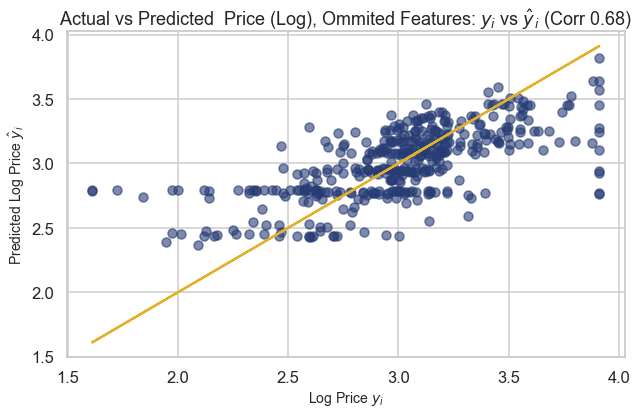

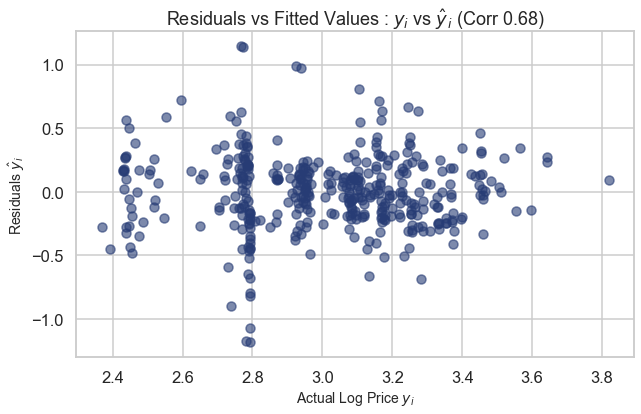

MSE : 0.09, rsquared : 0.46


In [69]:
# Origional model  : log price ommiting key features
prices = np.log(data["PRICE"])  # use log prive
features = data.drop(["PRICE","INDUS","AGE", "RM", "LSTAT", "NOX" , "CRIM"], axis = 1)

X_train, X_test, y_train , y_test = train_test_split(features, prices, test_size =0.2 ,
                                                     random_state = 10)

x_incl_const = sm.add_constant(X_train)

model = sm.OLS(y_train, x_incl_const) 
results = model.fit()

#residuals
# residuals = y_train - results.fittedvalues
# results.resid

# Graph of Actual vs Predicted Prices LOG

corr = round(y_train.corr(results.fittedvalues), 2)
plt.figure(figsize = (10,6))
plt.scatter(x = y_train , y = results.fittedvalues , c = "#273c75" , alpha = 0.6)
plt.plot(y_train , y_train , color ="#e1b12c")
plt.title(f"Actual vs Predicted  Price (Log), Ommited Features: $y_i$ vs $\hat y_i$ (Corr {corr})")
plt.xlabel("Log Price $y_i$" , fontsize = 14) 
plt.ylabel("Predicted Log Price $\hat y_i$" , fontsize = 14)
plt.show()


#residuals vs predicted

plt.figure(figsize = (10,6))
plt.scatter(x = results.fittedvalues , y = results.resid , c = "#273c75" , alpha = 0.6)
plt.title(f"Residuals vs Fitted Values : $y_i$ vs $\hat y_i$ (Corr {corr})")

plt.xlabel("Actual Log Price $y_i$" , fontsize = 14) 
plt.ylabel("Residuals $\hat y_i$" , fontsize = 14)
plt.show() 

#MSE + rsquared

ommited_var_mse = round(results.mse_resid, 3)
ommited_var_rsquared = round(results.rsquared,3)
print(f"MSE : {ommited_var_mse}, rsquared : {ommited_var_rsquared}")

In [70]:
pd.DataFrame({"R-Squared" : [reduced_log_rsquared , full_normal_rsquared , ommited_var_rsquared],
              "MSE" : [reduced_log_mse , full_normal_mse , ommited_var_mse],
             "RMSE": np.sqrt([reduced_log_mse , full_normal_mse , ommited_var_mse])},
             index = ["Reduced Log Model" , "Full Normal Model", "Ommited Var Model"])

# ms is absolout value and mse is relative- units of target

R-Squared     MSE      RMSE
Reduced Log Model      0.792   0.035  0.187083
Full Normal Model      0.750  19.921  4.463295
Ommited Var Model      0.460   0.090  0.300000

In [71]:
## sigma == standered deviation

In [72]:
print(f" 1 s.d in log price is {np.sqrt(reduced_log_mse)}")
print(f" 2 s.d in log price is {np.sqrt(2*reduced_log_mse)}")

upper_bound = np.log(30) + 2* np.sqrt(reduced_log_mse)
print(f"Upper bound for a 95% prediction in log price interval is {round(upper_bound,3)}")
print(f"Upper bound for a 95% prediction in normal price interval is {round(np.e**upper_bound * 1000 , 2)}")

lower_bound = np.log(30) - 2* np.sqrt(reduced_log_mse)
print(f"Lower bound for a 95% prediction in log price interval is {round(lower_bound,3)}")
print(f"Lower bound for a 95% prediction in normal price interval is {round(np.e**lower_bound * 1000,2)}")

 1 s.d in log price is 0.18708286933869708
 2 s.d in log price is 0.2645751311064591
Upper bound for a 95% prediction in log price interval is 3.775
Upper bound for a 95% prediction in normal price interval is 43613.34
Lower bound for a 95% prediction in log price interval is 3.027
Lower bound for a 95% prediction in normal price interval is 20635.89
